# Block 1

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# 1️⃣ ตั้งค่า seed เพื่อให้ผลลัพธ์ reproducible (เหมือนเดิมทุกครั้งที่รัน)
np.random.seed(42)

# 2️⃣ สร้างข้อมูลจำลอง X และ y
X = np.sort(5 * np.random.rand(40, 1), axis=0)  # ฟังก์ชัน np.random.rand(40, 1) จะทำการ สุ่มตัวเลข จำนวน 40 ตัว ที่มีค่าตั้งแต่ 0 ถึง 1 (ไม่รวม 1)
# คูณค่าทุกค่า ในอาเรย์ด้วย 5 ซึ่งจะทำให้ช่วงของค่าที่ได้ขยายจาก [0, 1) ไปเป็น [0, 5)
X[:5]

array([[0.10292247],
       [0.23225206],
       [0.29041806],
       [0.32525796],
       [0.48836057]])

In [190]:
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # การใช้ .ravel() เพื่อแปลงอาเรย์เป็น 1D มักจะทำในกรณีที่เราต้องการให้ข้อมูลมีรูปร่างเป็นอาเรย์หนึ่งมิติ (flat array) 
# ซึ่งจะช่วยให้เราสามารถใช้ข้อมูลได้ง่ายขึ้นในบางการคำนวณหรือในบางฟังก์ชันที่ต้องการอาเรย์แบบ 1D
# np.mean(), np.sum() สร้างค่าตอบสนอง y โดยใช้ฟังก์ชัน sine + noise

# np.random.normal(0, 0.1, X.shape[0]) คือการสร้าง ชุดข้อมูลสุ่ม ที่มีการกระจายแบบ ปกติ (Normal Distribution) โดยมีค่าพารามิเตอร์ที่กำหนด ดังนี้:
# 0: ค่า เฉลี่ย (mean) ของการกระจายปกติ ซึ่งในที่นี้คือ 0
# 0.1: ค่า ส่วนเบี่ยงเบนมาตรฐาน (standard deviation) ซึ่งในที่นี้คือ 0.1

# การให้จำนวนค่าผิดปกติที่สุ่มออกมาตรงกับ X.shape[0] เป็นการทำให้ จำนวนตัวอย่าง ใน X และ y ตรงกัน เพื่อให้โมเดลสามารถจับคู่ข้อมูลได้ถูกต้องและสมเหตุสมผล.
# X.shape[0] คือจำนวนตัวอย่าง




In [191]:
X_test = np.linspace(0, 5, 100)
X_test

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

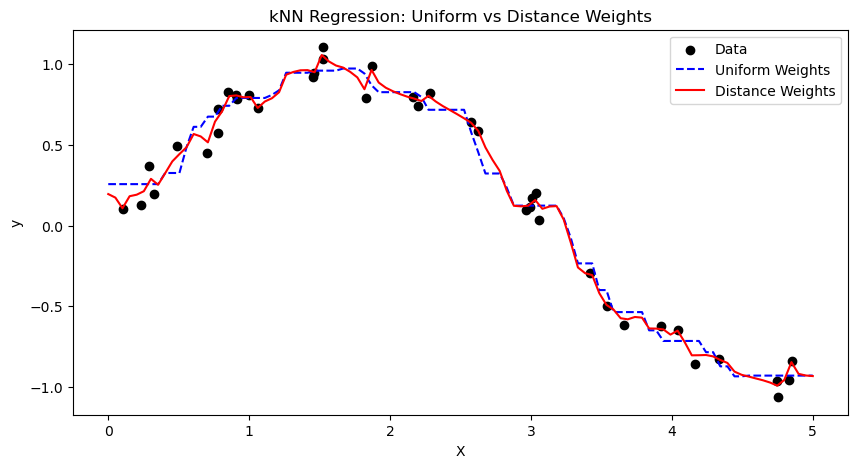

In [ ]:
# สิ่งที่เข้า  KNeighborsRegressor / KNeighborsClassifier คือ 2d only

# 3️⃣ กำหนดจุดที่ต้องการพยากรณ์ (ใช้ช่วงค่า 0 ถึง 5 จำนวน 100 จุด)
X_test = np.linspace(0, 5, 100).reshape(-1, 1) # .reshape(-1, 1)ให้เป็น 2D array ที่มีแค่ 1 คอลัมน์ 

# 4️⃣ สร้างโมเดล kNN Regression แบบ Uniform Weights (ทุกเพื่อนบ้านมีน้ำหนักเท่ากัน)
knn_uniform = KNeighborsRegressor(n_neighbors=5, weights="uniform")  # ใช้ k=5
knn_uniform.fit(X, y)  # ฝึกโมเดลด้วยข้อมูล X และ y
y_pred_uniform = knn_uniform.predict(X_test)  # ทำนายค่า y สำหรับ X_test

# 5️⃣ สร้างโมเดล kNN Regression แบบ Distance Weights (เพื่อนบ้านใกล้กว่าจะมีน้ำหนักมากกว่า)
knn_distance = KNeighborsRegressor(n_neighbors=5, weights="distance")  # ใช้ k=5 เช่นกัน
knn_distance.fit(X, y)  # ฝึกโมเดล
y_pred_distance = knn_distance.predict(X_test)  # ทำนายค่า y สำหรับ X_test

# 6️⃣ แสดงผลลัพธ์ด้วยกราฟ
plt.figure(figsize=(10, 5))  # กำหนดขนาดของกราฟ

# 7️⃣ พล็อตจุดข้อมูลจริง
plt.scatter(X, y, color="black", label="Data")  # จุดสีดำแทนข้อมูลจริง

# 8️⃣ พล็อตเส้นการพยากรณ์ของ Uniform Weights
plt.plot(X_test, y_pred_uniform, label="Uniform Weights", color="blue", linestyle="dashed")

# 9️⃣ พล็อตเส้นการพยากรณ์ของ Distance Weights
plt.plot(X_test, y_pred_distance, label="Distance Weights", color="red")

# 1️⃣0️⃣ ปรับแต่งกราฟ
plt.xlabel("X")  # Label แกน X
plt.ylabel("y")  # Label แกน Y
plt.legend()  # แสดง legend อธิบายเส้นต่างๆ
plt.title("kNN Regression: Uniform vs Distance Weights")  # ชื่อกราฟ

plt.show()


# Block 2

In [193]:
# Import libraries
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


In [194]:
breast_cancer = datasets.load_breast_cancer()

# Creating a DataFrame from the dataset for easier manipulation
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['target'] = breast_cancer.target

# Save the datapoints into the variable X and the targets into the variable y
X = breast_cancer.data 
y = breast_cancer.target

In [195]:
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [196]:
# แบ่งข้อมูลเป็น training และ testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

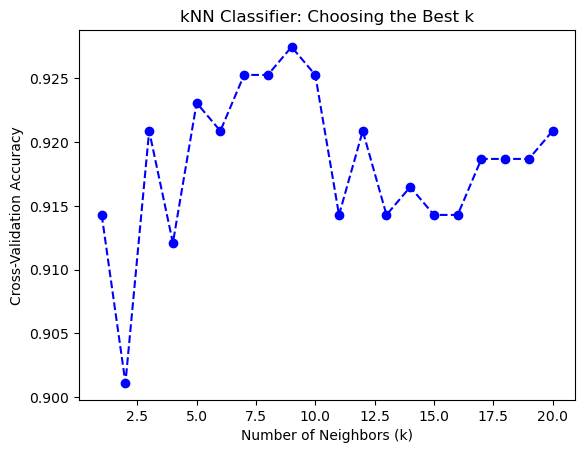

In [197]:
# สร้าง list เพื่อเก็บค่า accuracy สำหรับแต่ละค่า k
k_values = range(1, 21)
cv_scores = []

# ใช้ cross-validation เพื่อหาค่า k ที่ดีที่สุด
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Cross-validation score (5-fold cross-validation)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy') #ในแต่ละรอบ (fold) จะเลือก 1 fold เป็นชุดทดสอบ (validation set) และ 4 fold ที่เหลือเป็นชุดฝึกสอน (training set)
    cv_scores.append(np.mean(scores))

# แสดงผลการเปรียบเทียบค่า k
plt.plot(k_values, cv_scores, color='blue', linestyle='dashed', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('kNN Classifier: Choosing the Best k')
plt.show()


In [198]:
# เลือกค่า k ที่ให้ผลลัพธ์ดีที่สุด
best_k = k_values[np.argmax(cv_scores)]
print(f"The best value of k is {best_k} with an accuracy of {max(cv_scores):.4f}.")

# สร้างโมเดล kNN ด้วยค่า k ที่ดีที่สุด
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# ทดสอบโมเดลกับ test set
test_accuracy = knn_best.score(X_test, y_test)
print(f"Test accuracy with k={best_k}: {test_accuracy:.4f}")

The best value of k is 9 with an accuracy of 0.9275.
Test accuracy with k=9: 0.9561


In [199]:
from sklearn.metrics import confusion_matrix, classification_report


# ทำนายค่าผลลัพธ์บน test set
y_pred = knn_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)
# Performance Metrics: Precision, Recall, F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# แสดง Confusion Matrix เป็น

[[39  4]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_94474/1914505494.py:8: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', label='Predicted', edgecolor='k')


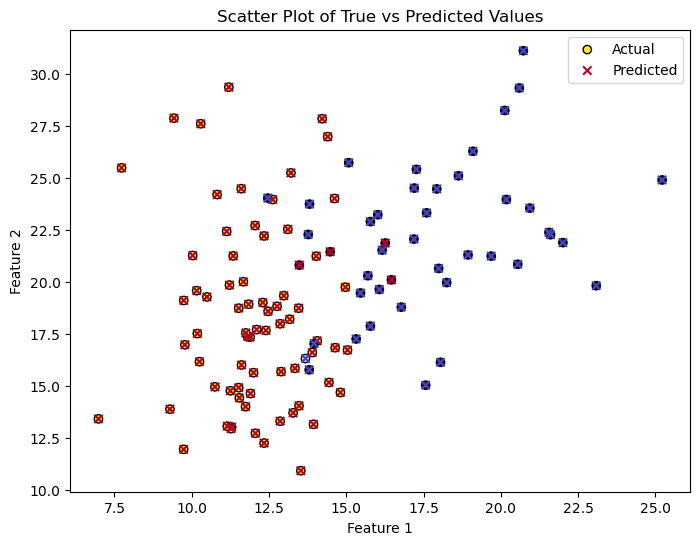

In [200]:
# การใช้ Scatter plot เพื่อแสดงตำแหน่งของข้อมูลจริง (y_test) และค่าทำนาย (y_pred)
plt.figure(figsize=(8,6))

# แสดงข้อมูลจริง (y_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', label='Actual', edgecolor='k')

# แสดงค่าทำนาย (y_pred)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', label='Predicted', edgecolor='k')

# แสดง Legend
plt.legend()

plt.title("Scatter Plot of True vs Predicted Values")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [201]:
# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [202]:
# Load the wine dataset from sklearn. You may want to take a look at the format of the dataset
iris = datasets.load_iris()

# Creating a DataFrame from the dataset for easier manipulation
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Save the datapoints into the variable X and the targets into the variable y
X = iris.data 
y = iris.target

In [203]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [204]:

# แบ่งข้อมูลเป็น training set และ test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [205]:

knn = KNeighborsClassifier()

# กำหนดช่วงของค่า k ที่ต้องการทดสอบ
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 15, 20]}

# ใช้ GridSearchCV เพื่อค้นหาค่า k ที่ดีที่สุด
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# แสดงค่า k ที่ดีที่สุด
print(f"The best value of k is: {grid_search.best_params_['n_neighbors']}")

# สร้างโมเดล kNN ด้วยค่า k ที่ดีที่สุด
best_knn = grid_search.best_estimator_

# ทดสอบโมเดลกับ test set
y_pred = best_knn.predict(X_test)

# Performance Metrics: Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# แสดงผล Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


The best value of k is: 7
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [206]:
print(cm)


[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [207]:
# สร้างโมเดล KNeighborsClassifier
knn = KNeighborsClassifier()

# กำหนดช่วงของค่าพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# ใช้ GridSearchCV เพื่อค้นหาค่าพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print(f"The best parameters are: {grid_search.best_params_}")

# สร้างโมเดล kNN ด้วยพารามิเตอร์ที่ดีที่สุด
best_knn = grid_search.best_estimator_

# ทดสอบโมเดลกับ test set
y_pred = best_knn.predict(X_test)

# Performance Metrics: Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# แสดงผล Confusion Matrix
cm = confusion_matrix(y_test, y_pred)



The best parameters are: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [208]:
# default weight ใน KNeighborsClassifier ของ scikit-learn คือ 'uniform' ครับ

In [209]:
# นำเข้าห้องสมุดที่จำเป็น
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# โหลดข้อมูล Iris dataset
iris = load_iris()
X = iris.data  # คุณสมบัติ (features)
y = iris.target  # ค่าผลลัพธ์ (labels)

# เลือกแค่ 2 class (2 ผลลัพธ์) เพื่อให้เป็น binary classification
# เลือกแค่ 2 class สำหรับการทำ binary classification
X = X[y != 2, :2]  # ใช้แค่ 2 ฟีเจอร์แรก (สำหรับการทำ 2D visualization)
y = y[y != 2]

# แบ่งข้อมูลเป็น training set และ test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# สร้างโมเดล Logistic Regression
model = LogisticRegression()

# ฝึกโมเดลด้วยข้อมูล train
model.fit(X_train, y_train)

# ทำนายผลลัพธ์บนข้อมูล test
y_pred = model.predict(X_test)

# แสดง Accuracy และ Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# สร้าง Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[17  0]
 [ 0 13]]


In [210]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# โหลดข้อมูล Iris dataset
iris = load_iris()
X = iris.data  # คุณสมบัติ (features)
y = iris.target  # ค่าผลลัพธ์ (labels)

# แบ่งข้อมูลเป็น training set และ test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# สร้างโมเดล Logistic Regression สำหรับ Multi-class
model = LogisticRegression(multi_class='ovr', max_iter=200)  # ใช้ One-vs-Rest และเพิ่ม max_iter เพื่อให้คำนวณเสร็จ

# ฝึกโมเดลด้วยข้อมูล train
model.fit(X_train, y_train)

# ทำนายผลลัพธ์บนข้อมูล test
y_pred = model.predict(X_test)

# แสดง Accuracy และ Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9555555555555556
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



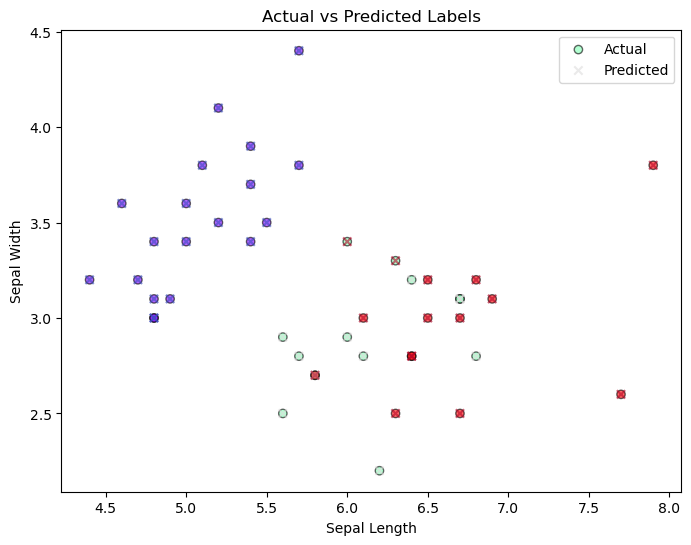

In [211]:
#  กราฟการทำนายผลลัพธ์
# เลือก 2 features เพื่อให้แสดงในกราฟ 2D
X_test_2d = X_test[:, :2]  # เลือกแค่ 2 features แรก (sepal length, sepal width)

# สร้าง scatter plot
plt.figure(figsize=(8, 6))

# แสดงข้อมูลจริง (y_test)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap='rainbow', label='Actual', marker='o', edgecolors='k', alpha=0.6)

# แสดงข้อมูลที่ทำนาย (y_pred)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred, cmap='coolwarm', label='Predicted', marker='x', alpha=0.6)

# ตั้งค่าป้ายชื่อ
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Actual vs Predicted Labels')

# เพิ่ม Legend
plt.legend()

# แสดงกราฟ
plt.show()

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

# แปลงข้อมูลเป็น DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df['HousePrice'] = california.target # ราคาบ้าน (หน่วย: 100,000 ดอลลาร์)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [213]:

### 🏡 Part 1: Linear Regression (California Housing) ###
# โหลดข้อมูล California Housing

california = fetch_california_housing()
X_california = california.data
y_california = california.target  

X_california

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [214]:

# แบ่ง train/test set
X_train, X_test, y_train, y_test = train_test_split(X_california, y_california, test_size=0.2, random_state=42)

In [215]:
# เทรน Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# พยากรณ์ค่า
y_pred = lin_reg.predict(X_test)

In [216]:
# คำนวณ MSE และ R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MSE: {mse:.2f}, R² Score: {r2:.2f}")

Linear Regression - MSE: 0.56, R² Score: 0.58


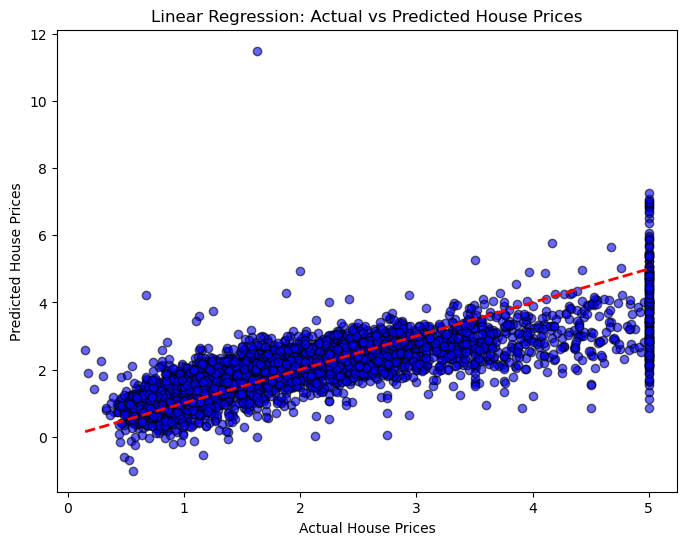

In [ ]:
# สร้างกราฟเปรียบเทียบค่าจริงกับค่าทำนาย
plt.figure(figsize=(8,6))

# สร้างกราฟ Scatter plot ของค่าจริง vs ค่าทำนาย
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='k', marker='o')

# แสดงเส้นที่แสดงความสัมพันธ์ระหว่างค่าจริงและค่าทำนาย (Ideal line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Linear Regression: Actual vs Predicted House Prices')

plt.show()

ค่า Mean Squared Error (MSE) = 0.56 และ R² Score = 0.58 บอกอะไรเกี่ยวกับโมเดล? 🤔

🔍 การวิเคราะห์ผลลัพธ์
- MSE (Mean Squared Error) = 0.56

ค่า MSE ต่ำแปลว่าโมเดลมีความคลาดเคลื่อน (Error) ต่ำ

แต่ถ้า MSE สูง แปลว่ามีการคาดการณ์ผิดพลาดมาก

0.56 หมายความว่าโดยเฉลี่ย ความคลาดเคลื่อนของโมเดลในการทำนายราคาบ้านจะอยู่ที่ประมาณ 0.56 หน่วย (ในที่นี้คือ 100,000 ดอลลาร์) ไม่ต่ำมาก ดังนั้นโมเดลอาจจะยังไม่สมบูรณ์แบบ

- R² Score = 0.58

ค่า R² (Coefficient of Determination) บอกว่าโมเดลอธิบายความแปรปรวนของข้อมูลได้ดีแค่ไหน

ถ้า R² = 1 → โมเดลสมบูรณ์แบบ (อธิบายได้ 100%)

ถ้า R² = 0 → โมเดลไม่ได้ช่วยอธิบายข้อมูลเลย

ค่า 0.58 (~58%) แปลว่าโมเดลสามารถอธิบายข้อมูลได้ ประมาณ 58% ซึ่งยังไม่ดีนัก


# Single Layer Neural Network

In this question we apply a single-layer neural network to a linearly separable toy data set.

Perceptron เป็นโมเดลที่เหมาะสำหรับการทำ binary classification ด้วยหลักการ linear classification โดยมันจะใช้ step function ในการตัดสินใจว่าแต่ละข้อมูลจะเป็นคลาสไหน ซึ่งทำงานได้ดีในกรณีที่ข้อมูลสามารถแยกออกเป็น 2 กลุ่มโดยใช้เส้นตรง (หรือ hyperplane) แต่จะมีข้อจำกัดหากข้อมูลไม่สามารถแยกออกได้ด้วยเส้นตรง.

ใช่ครับ **Perceptron** เป็น **single-layer neural network** หรือ **single-layer perceptron (SLP)** ซึ่งหมายความว่าโมเดลนี้ประกอบด้วยเพียง **หนึ่งชั้น** ที่ใช้ในการประมวลผลข้อมูล โดยไม่มีชั้นซ่อน (hidden layers) ระหว่าง input และ output

### โครงสร้างของ Perceptron:
- **Input layer**: รับข้อมูลจากภายนอก (features) เช่น ค่าตัวแปรต่างๆ ที่เราต้องการใช้ในการแยกประเภท
- **Output layer**: เป็นชั้นเดียวที่ให้ผลลัพธ์การแยกประเภท โดยจะตัดสินใจว่า input ควรจะถูกจัดอยู่ในคลาสใด (เช่น คลาส 0 หรือ 1)
- **Weights และ Bias**: แต่ละ input จะมีน้ำหนัก (weights) ที่ปรับค่าตามระหว่างการฝึก และ bias ที่ช่วยปรับการตัดสินใจให้ยืดหยุ่นขึ้น

### ลักษณะของ Perceptron (Single-Layer):
- **ไม่มี hidden layers**: ไม่มีชั้นที่อยู่ระหว่าง input และ output ดังนั้นการคำนวณจะทำจาก input โดยตรงไปยัง output
- **ใช้งานฟังก์ชันการกระตุ้น (activation function)**: ในกรณีของ Perceptron ใช้ฟังก์ชัน **step function** ซึ่งจะคำนวณว่า output จะเป็น 1 หรือ 0 ตามค่าที่ได้จากการคำนวณน้ำหนักและ bias
- **ทำงานได้เฉพาะกับข้อมูลที่สามารถแยกได้ด้วยเส้นตรง**: ถ้าข้อมูลไม่สามารถแยกได้ด้วยเส้นตรง (เช่น XOR problem) โมเดลนี้จะไม่สามารถทำงานได้ดี

### **การปรับเปลี่ยนให้เป็น Multi-layer (MLP)**:
เมื่อมีการใช้ **หลายชั้น (multi-layers)** หรือ **hidden layers** ที่อยู่ระหว่าง input และ output จะกลายเป็น **Multi-Layer Perceptron (MLP)** ซึ่งจะทำให้โมเดลสามารถเรียนรู้ลักษณะของข้อมูลที่ซับซ้อนมากขึ้น โดย MLP ใช้ฟังก์ชันการกระตุ้นที่ซับซ้อนกว่าฟังก์ชัน step เช่น **sigmoid**, **ReLU**, หรือ **tanh** เพื่อให้โมเดลสามารถเรียนรู้ลักษณะข้อมูลที่ซับซ้อนได้

### ตัวอย่างการเปรียบเทียบ:
- **Single-Layer Perceptron (SLP)**: ใช้แค่ชั้นเดียวในการคำนวณการแยกประเภท
- **Multi-Layer Perceptron (MLP)**: ใช้หลายชั้นในการคำนวณ ทำให้สามารถแยกข้อมูลที่ซับซ้อนได้มากขึ้น

### สรุป:
**Perceptron** เป็น **single-layer neural network** ที่ใช้ **หนึ่งชั้น** ในการตัดสินใจการแยกประเภทของข้อมูล ซึ่งเหมาะสำหรับปัญหาที่ข้อมูลสามารถแยกออกจากกันได้ด้วยเส้นตรง (linear separability) แต่หากข้อมูลซับซ้อนกว่านั้น จำเป็นต้องใช้ **multi-layer perceptron** (MLP) ที่มีหลายชั้นเพื่อสามารถแยกข้อมูลที่ซับซ้อนได้

In [218]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import Perceptron

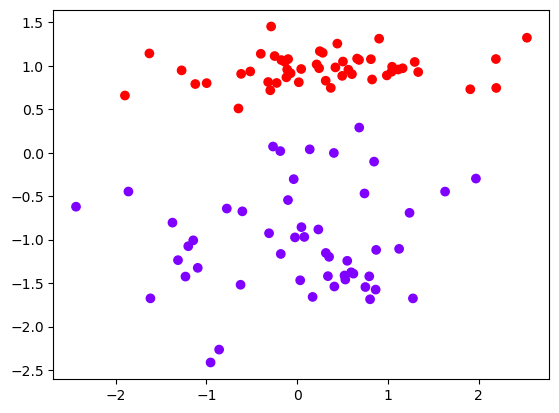

In [219]:
X1, y1 = make_classification(n_features=2, n_redundant=0, \
            n_informative=1, random_state=1,n_clusters_per_class=1) 
fig1, ax1 = plt.subplots();
ax1.scatter(X1[:,0],X1[:,1],c=y1, cmap='rainbow')
plt.show()

โค้ดที่คุณให้มาคือการใช้ฟังก์ชัน `make_classification` จาก `sklearn.datasets` เพื่อสร้างชุดข้อมูลจำลอง (synthetic dataset) สำหรับงาน **Classification** (การจำแนกประเภท) ซึ่งสามารถนำไปใช้ในการทดสอบโมเดลต่างๆ ได้ โดยรายละเอียดของโค้ดมีดังนี้:

### ส่วนประกอบของโค้ด:

1. **`make_classification`**:
   - ฟังก์ชันนี้ถูกใช้เพื่อสร้างข้อมูลจำลองสำหรับงาน Classification โดยสามารถปรับแต่งลักษณะของข้อมูลได้หลากหลาย โดยมีพารามิเตอร์ต่างๆ ดังนี้:
     - `n_features=2`: จำนวนของฟีเจอร์ (features) ที่จะสร้างในชุดข้อมูล (ในกรณีนี้มี 2 ฟีเจอร์)
     - `n_redundant=0`: จำนวนฟีเจอร์ที่มีความสัมพันธ์กัน (redundant features) ในชุดข้อมูล (ในที่นี้ไม่มีฟีเจอร์ที่ซ้ำกัน)

     คือฟีเจอร์ที่มีความสัมพันธ์หรือซ้ำซ้อนกับฟีเจอร์อื่นๆ อย่างใกล้ชิด เช่น หากเรามีฟีเจอร์หนึ่งที่เป็น "อายุ" และอีกฟีเจอร์หนึ่งที่เป็น "อายุในปีที่ผ่านมา" ก็ถือเป็นฟีเจอร์ที่มีความสัมพันธ์กันมาก เพราะมีข้อมูลที่เหมือนกันหรือค่อนข้างใกล้เคียงกัน


     - `n_informative=1`: จำนวนฟีเจอร์ที่มีข้อมูลที่สามารถช่วยในการแยกประเภท (informative features) (ในที่นี้มี 1 ฟีเจอร์ที่ช่วยในการแยกประเภท)

ฟีเจอร์ที่มีข้อมูลที่สามารถช่วยในการแยกประเภท (Informative Features) คือฟีเจอร์ที่มีข้อมูลสำคัญที่ช่วยในการจำแนกประเภทข้อมูล เช่น ในงานแยกประเภทของผลไม้ ฟีเจอร์อย่าง "น้ำหนัก" หรือ "ขนาด" อาจจะเป็นฟีเจอร์ที่สำคัญในการแยกประเภทของผลไม้แต่ละชนิด

     ตัวอย่าง:
สมมติว่าเรากำลังสร้างชุดข้อมูลสำหรับการจำแนกประเภทของผลไม้ (ผลไม้ A, B, C):

เรามี 3 ฟีเจอร์:
1. น้ำหนัก (น้ำหนักของผลไม้)
2. สี (สีของผลไม้)
3. ขนาด (ขนาดของผลไม้)

หากเรากำหนด:

n_informative=1 หมายความว่าแค่ น้ำหนัก เป็นฟีเจอร์ที่สำคัญในการแยกประเภทของผลไม้

n_redundant=0 หมายความว่า ฟีเจอร์ สี และ ขนาด จะไม่ได้ช่วยในการแยกประเภทของผลไม้เลย และจะไม่มีฟีเจอร์ที่ซ้ำซ้อนกัน (หมายความว่า ไม่มีฟีเจอร์ที่ซ้ำซ้อนกับน้ำหนัก)



     - `random_state=1`: ค่า seed สำหรับการสุ่มข้อมูล เพื่อให้ผลลัพธ์สามารถจำลองได้ (reproducible)
     - `n_clusters_per_class=1`: จำนวนคลัสเตอร์ (clusters) ที่จะแบ่งในแต่ละประเภท (ในที่นี้มี 1 คลัสเตอร์ต่อประเภท)

   ผลลัพธ์จาก `make_classification` จะเป็น **X1** (ข้อมูลฟีเจอร์) และ **y1** (ค่าผลลัพธ์ หรือ labels) ซึ่ง `X1` จะเป็นอาเรย์ที่มีขนาด `(n_samples, n_features)` และ `y1` จะเป็นอาเรย์ที่มีขนาด `(n_samples,)` ซึ่งเก็บค่าผลลัพธ์ที่เป็นประเภทของข้อมูล (เช่น 0 หรือ 1 สำหรับปัญหาการจำแนกประเภท 2 กลุ่ม)

2. **`fig1, ax1 = plt.subplots()`**:
   - สร้างกราฟใหม่ โดย `fig1` คือฟิกเกอร์ (figure) และ `ax1` คือแกน (axis) สำหรับการ plot ข้อมูล

3. **`ax1.scatter(X1[:,0], X1[:,1], c=y1, cmap='rainbow')`**:
   - ใช้ `scatter` เพื่อสร้างกราฟกระจาย (scatter plot) โดย:
     - `X1[:,0]`: ค่าในคอลัมน์แรก (ฟีเจอร์แรก) ของ `X1` ซึ่งเป็นแกน x
     - `X1[:,1]`: ค่าในคอลัมน์ที่สอง (ฟีเจอร์ที่สอง) ของ `X1` ซึ่งเป็นแกน y
     - `c=y1`: กำหนดสีของจุดในกราฟตามค่าของ `y1` ซึ่งจะเป็นค่าของ labels (ประเภทข้อมูล) เช่น 0 หรือ 1
     - `cmap='rainbow'`: ใช้แผนที่สี (color map) แบบ 'rainbow' เพื่อแสดงสีที่แตกต่างกันตามค่าของ `y1`

4. **`plt.show()`**:
   - แสดงกราฟที่สร้างขึ้น

### ผลลัพธ์ที่ได้:
- กราฟกระจายที่แสดงข้อมูลจาก `X1` โดยจุดที่มีสีแตกต่างกันจะถูกกำหนดตามค่า `y1` (ค่าผลลัพธ์หรือ labels) ซึ่งจะทำให้เรามองเห็นการจำแนกประเภทของข้อมูลที่สร้างขึ้น
- ข้อมูลที่สร้างขึ้นจะมี 2 ฟีเจอร์ (ทำให้เราสามารถพล็อตกราฟได้ใน 2 มิติ) และมี 2 คลาส (ประเภท) โดยแต่ละคลาสจะมีจุดที่กระจายอยู่ในกราฟ

### ตัวอย่างกราฟที่ได้:
- จุดหนึ่งๆ ในกราฟจะมีสีแตกต่างกันตามประเภทของมัน เช่นสีหนึ่งอาจจะเป็นสีแดง (ประเภท 1) และอีกสีหนึ่งอาจจะเป็นสีฟ้า (ประเภท 0)


In [220]:
y1

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. สร้างและฝึก Perceptron
nn1 = Perceptron(max_iter=1000)
model = nn1.fit(X_train, y_train)

# 3. ทำนายผลลัพธ์
y_pred = model.predict(X_test)

# 4. คำนวณความแม่นยำ (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 82.22%


# Multi-Layer NN on Toy Problems
In this question we consider two toy problems in which the classes are not linearly separable. In the first example the two classes form moon shapes.

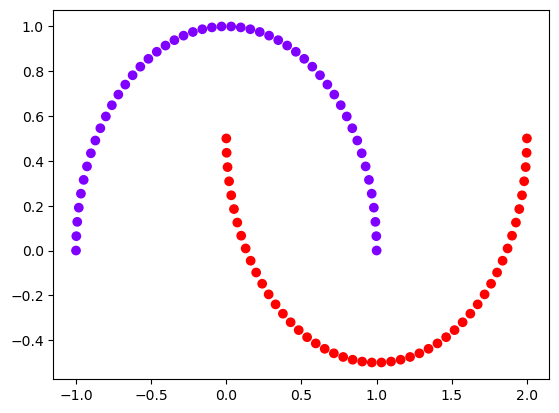

In [222]:
X2, y2 = make_moons()
fig2, ax2 = plt.subplots()
ax2.scatter(X2[:,0],X2[:,1],c=y2, cmap='rainbow')

Try fitting a single-layer neural network to the data. 
Comment on the performance and hypothesise what might be the source of the errors.

Accuracy: 1.00


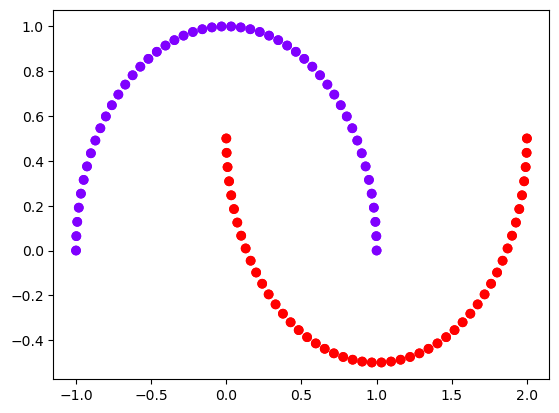

In [223]:
nn2=MLPClassifier(hidden_layer_sizes=(10,10,10,10), max_iter=1000)
model2=nn2.fit(X2,y2)
ypred2=model2.predict(X2)

# คำนวณ Accuracy
accuracy = accuracy_score(y2, ypred2)
print(f"Accuracy: {accuracy:.2f}")

ax2.scatter(X2[:,0],X2[:,1],c=ypred2, cmap='rainbow')
fig2

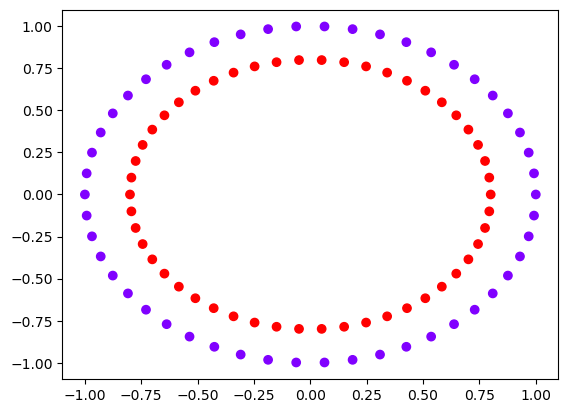

In [224]:
X3, y3 = make_circles()
fig3, ax3 = plt.subplots()
ax3.scatter(X3[:,0],X3[:,1],c=y3, cmap='rainbow')
plt.show()

Accuracy: 1.00


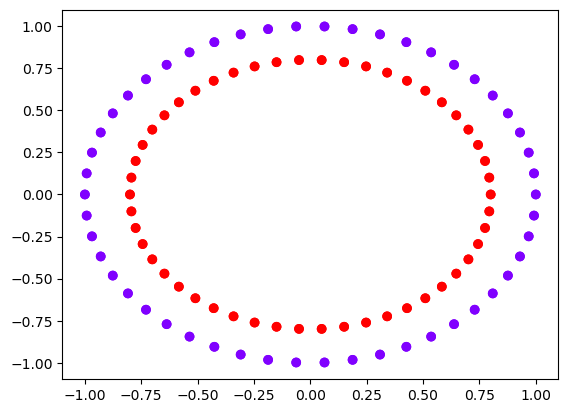

In [225]:
#TODO
nn3=MLPClassifier(hidden_layer_sizes=(100,400,100,599), max_iter=1000)
model3 = nn3.fit(X3, y3)
y3_pred = model3.predict(X3)

# คำนวณ Accuracy
accuracy = accuracy_score(y3, y3_pred)
print(f"Accuracy: {accuracy:.2f}")

ax3.scatter(X3[:,0],X3[:,1],c=y3_pred, cmap='rainbow')
fig3

In [226]:

from sklearn.naive_bayes import GaussianNB

# โหลดข้อมูล Iris dataset
iris = load_iris()
X = iris.data  # ฟีเจอร์ (features)
y = iris.target  # ค่าผลลัพธ์ (labels)

# แบ่งข้อมูลเป็น training set และ test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# สร้างและฝึกโมเดล Naive Bayes (Gaussian Naive Bayes)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# ทำนายผลลัพธ์บนข้อมูล test
ypred = nb_model.predict(X_test)

# คำนวณ Accuracy
accuracy = accuracy_score(y_test, ypred)
print(f"Naive Bayes Accuracy: {accuracy:.2f}")

# แสดง Confusion Matrix
cm = confusion_matrix(y_test, ypred)
print("Confusion Matrix:\n", cm)



Naive Bayes Accuracy: 0.98
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [227]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

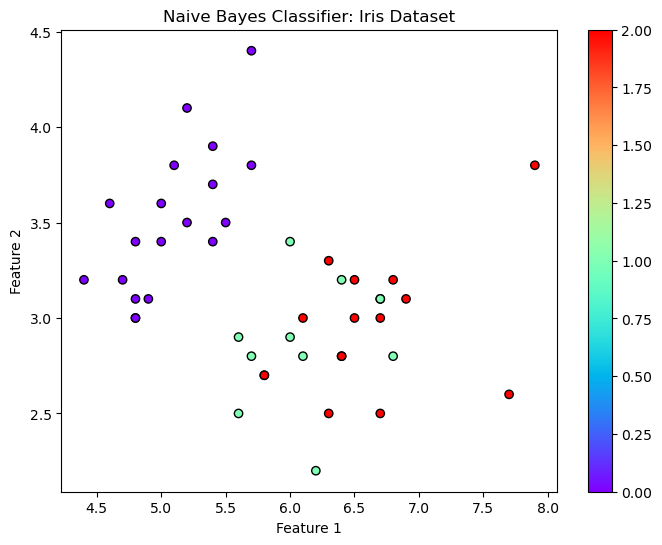

In [228]:
# สร้างกราฟเพื่อแสดงผลการทำนาย
plt.figure(figsize=(8, 6))

# Plot จุดข้อมูล
plt.scatter(X_test[:, 0], X_test[:, 1], c=ypred, cmap='rainbow', edgecolors='k', marker='o')

# แสดงผลลัพธ์
plt.title('Naive Bayes Classifier: Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()


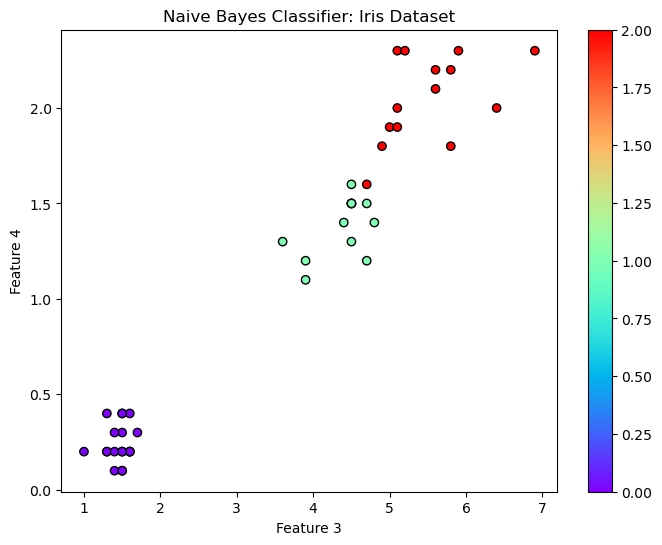

In [229]:
# สร้างกราฟเพื่อแสดงผลการทำนาย
plt.figure(figsize=(8, 6))

# Plot จุดข้อมูล
plt.scatter(X_test[:, 2], X_test[:, 3], c=ypred, cmap='rainbow', edgecolors='k', marker='o')

# แสดงผลลัพธ์
plt.title('Naive Bayes Classifier: Iris Dataset')
plt.xlabel('Feature 3')
plt.ylabel('Feature 4')
plt.colorbar()
plt.show()


In [3]:
import pandas as pd
import numpy as np

# สุ่มรายได้จริงแบบไม่แบ่งช่วงก่อน
np.random.seed(42)  # ให้ผลลัพธ์ reproducible
num_samples = 100  # จำนวนตัวอย่างข้อมูล

# สุ่มรายได้ครัวเรือนระหว่าง 15,000 - 100,000
household_income = np.random.randint(15000, 100000, size=num_samples)

# สร้าง DataFrame ข้อมูลดิบ
df = pd.DataFrame({'Household Income': household_income})

# แสดงผล
df.head()


,Household Income
0,30795
1,15860
2,91820
3,69886
4,21265


In [4]:
df.to_csv('Household_ex1')

In [5]:
Household_ex1 = pd.read_csv('Household_ex1')
Household_ex1

,Unnamed: 0,Household Income
0,0,30795
1,1,15860
2,2,91820
3,3,69886
4,4,21265
...,...,...
95,95,27666
96,96,53660
97,97,18561
98,98,41854


In [6]:
# กำหนดช่วงรายได้ตามเงื่อนไข
income_bins = [0, 30000, 40000, 50000, 100000]  # กำหนดขอบเขตแต่ละช่วง
income_labels = ['Below £30,001', '£30,001 – £40,000', '£40,001 – £50,000', '£50,001 and above']

# ใช้ pd.cut() เพื่อแบ่ง Household Income ออกเป็นช่วงรายได้
Household_ex1['Income Category'] = pd.cut(Household_ex1['Household Income'], bins=income_bins, labels=income_labels, ordered=True)

# แสดงผล
Household_ex1


,Unnamed: 0,Household Income,Income Category
0,0,30795,"£30,001 – £40,000"
1,1,15860,"Below £30,001"
2,2,91820,"£50,001 and above"
3,3,69886,"£50,001 and above"
4,4,21265,"Below £30,001"
...,...,...,...
95,95,27666,"Below £30,001"
96,96,53660,"£50,001 and above"
97,97,18561,"Below £30,001"
98,98,41854,"£40,001 – £50,000"


In [7]:
Household_ex1['Income Category'] = Household_ex1['Income Category'].astype('category')

# ตรวจสอบลำดับหมวดหมู่
print("\nCategories:", Household_ex1['Income Category'].cat.categories)



Categories: Index(['Below £30,001', '£30,001 – £40,000', '£40,001 – £50,000',
       '£50,001 and above'],
      dtype='object')


In [9]:
# สร้าง mapping จากชื่อกลุ่มรายได้ -> เป็นตัวเลข
income_mapping = {
    'Below £30,001': 1,
    '£30,001 – £40,000': 2,
    '£40,001 – £50,000': 3,
    '£50,001 and above': 4
}

# ใช้ .map() เพื่อแปลงค่า
Household_ex1['Income Category (Encoded)'] = Household_ex1['Income Category'].map(income_mapping)

# แสดงผล
Household_ex1


,Unnamed: 0,Household Income,Income Category,Income Category (Encoded)
0,0,30795,"£30,001 – £40,000",2
1,1,15860,"Below £30,001",1
2,2,91820,"£50,001 and above",4
3,3,69886,"£50,001 and above",4
4,4,21265,"Below £30,001",1
...,...,...,...,...
95,95,27666,"Below £30,001",1
96,96,53660,"£50,001 and above",4
97,97,18561,"Below £30,001",1
98,98,41854,"£40,001 – £50,000",3


In [ ]:
import pandas as pd

# สร้าง DataFrame ตามภาพ
data = {
    "College": ["H&SS", "MCS", "SCS", "Other"],
    "Count": [5, 6, 4, 5]
}

df = pd.DataFrame(data)
df



,College,Count
0,H&SS,5
1,MCS,6
2,SCS,4
3,Other,5


In [12]:
# คำนวณ Total Count
total_count = df["Count"].sum()

# คำนวณ Proportion (สัดส่วน)
df["Proportion"] = df["Count"] / total_count

# คำนวณ Percentage (เปอร์เซ็นต์)
df["Percentage"] = df["Proportion"] * 100

# แสดงผลลัพธ์
print(df)

  College  Count  Proportion  Percentage
0    H&SS      5        0.25        25.0
1     MCS      6        0.30        30.0
2     SCS      4        0.20        20.0
3   Other      5        0.25        25.0


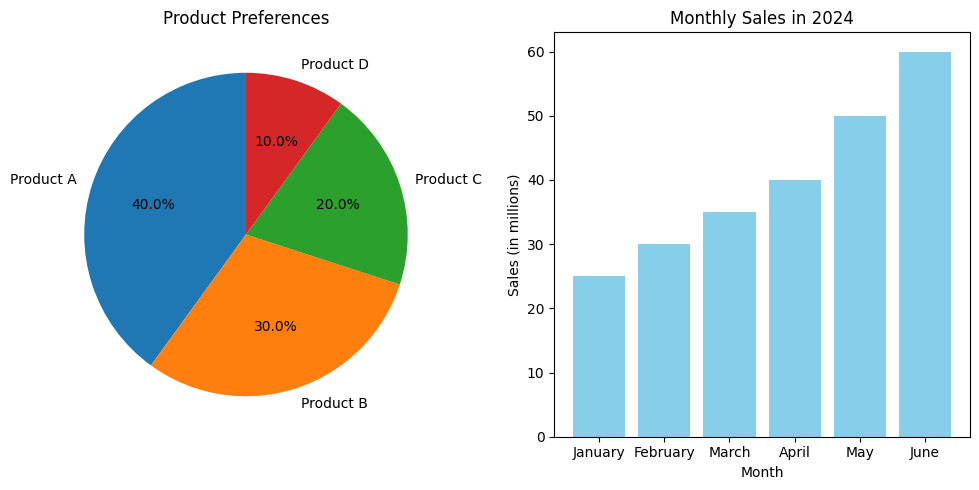

In [13]:
import matplotlib.pyplot as plt

# Data for Pie chart
products = ['Product A', 'Product B', 'Product C', 'Product D']
preferences = [40, 30, 20, 10]

# Data for Bar chart
months = ['January', 'February', 'March', 'April', 'May', 'June']
sales = [25, 30, 35, 40, 50, 60]

# Creating Pie Chart
plt.figure(figsize=(10, 5))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(preferences, labels=products, autopct='%1.1f%%', startangle=90)
plt.title('Product Preferences')

# Bar chart
plt.subplot(1, 2, 2)
plt.bar(months, sales, color='skyblue')
plt.title('Monthly Sales in 2024')
plt.xlabel('Month')
plt.ylabel('Sales (in millions)')

plt.tight_layout()
plt.show()


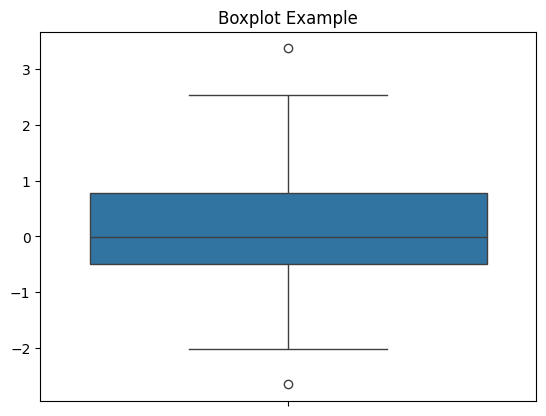

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data (for illustration purposes)
data = np.random.randn(100)  # Generate 100 random numbers from a normal distribution

# Create a boxplot using seaborn
sns.boxplot(data=data)

# Add a title
plt.title('Boxplot Example')

# Show the plot
plt.show()


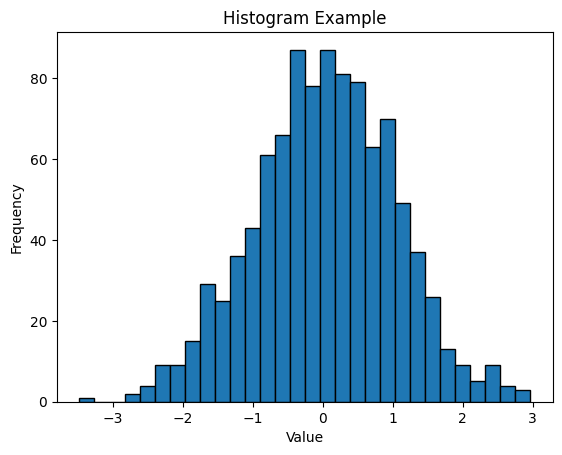

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
data = np.random.randn(1000)  # 1000 random numbers from a normal distribution

# Create a histogram
plt.hist(data, bins=30, edgecolor='black')

# Add a title and labels
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [17]:
import pandas as pd

# Sample data
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male'],
    'Preference': ['A', 'B', 'A', 'A', 'B', 'B', 'A', 'A']
}

# Create DataFrame
df = pd.DataFrame(data)

df


,Gender,Preference
0,Male,A
1,Female,B
2,Female,A
3,Male,A
4,Male,B
5,Female,B
6,Female,A
7,Male,A


In [18]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['Gender'], df['Preference'])

# Display the cross-tabulation
print(cross_tab)

Preference  A  B
Gender          
Female      2  2
Male        3  1


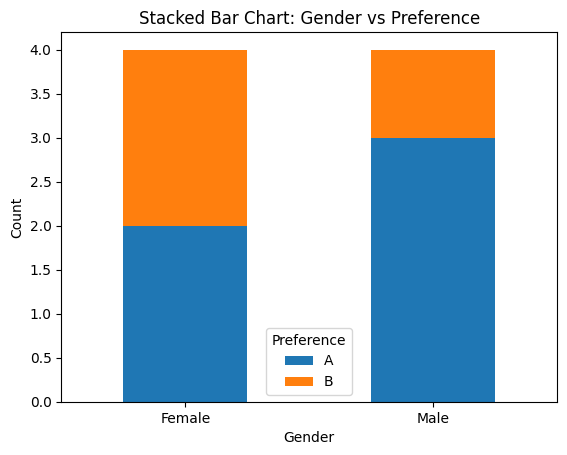

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male'],
    'Preference': ['A', 'B', 'A', 'A', 'B', 'B', 'A', 'A']
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a cross-tabulation of the two categorical variables
cross_tab = pd.crosstab(df['Gender'], df['Preference'])

# Plot a stacked bar chart
cross_tab.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Stacked Bar Chart: Gender vs Preference')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the plot
plt.show()


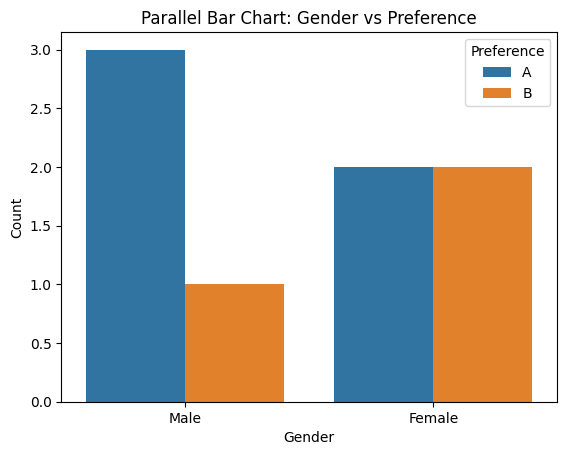

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male'],
    'Preference': ['A', 'B', 'A', 'A', 'B', 'B', 'A', 'A']
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a parallel bar chart (side-by-side bars)
sns.countplot(data=df, x='Gender', hue='Preference')

# Add labels and title
plt.title('Parallel Bar Chart: Gender vs Preference')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()


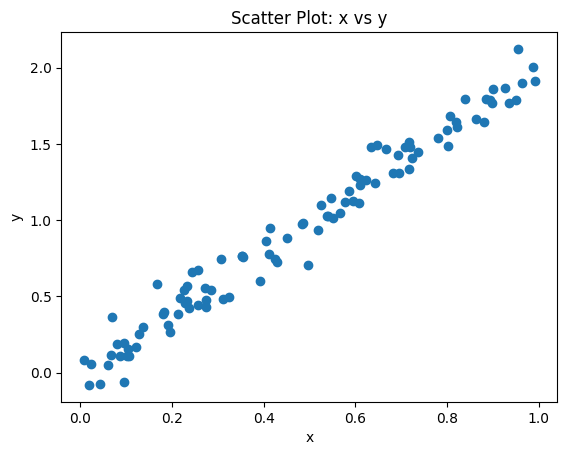

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: Two numerical variables
x = np.random.rand(100)  # 100 random values for the x-axis
y = 2 * x + np.random.normal(0, 0.1, 100)  # Linear relationship with some noise for the y-axis

# Create scatter plot
plt.scatter(x, y)

# Add title and labels
plt.title('Scatter Plot: x vs y')
plt.xlabel('x')
plt.ylabel('y')

# Show plot
plt.show()


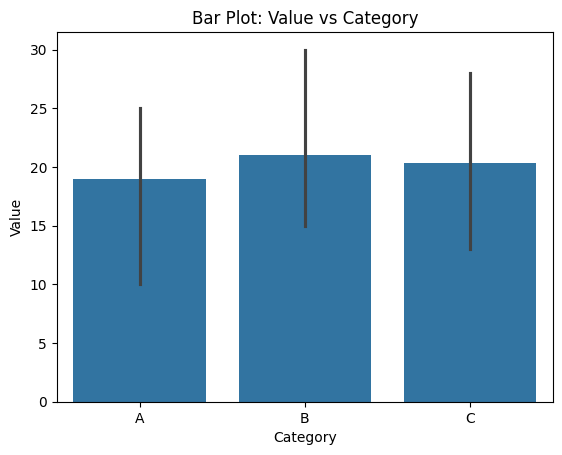

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data: One numerical variable and one categorical variable
data = {
    'Category': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Value': [10, 15, 13, 22, 18, 20, 25, 30, 28]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a bar plot
sns.barplot(x='Category', y='Value', data=df)

# Add title and labels
plt.title('Bar Plot: Value vs Category')
plt.xlabel('Category')
plt.ylabel('Value')

# Show plot
plt.show()


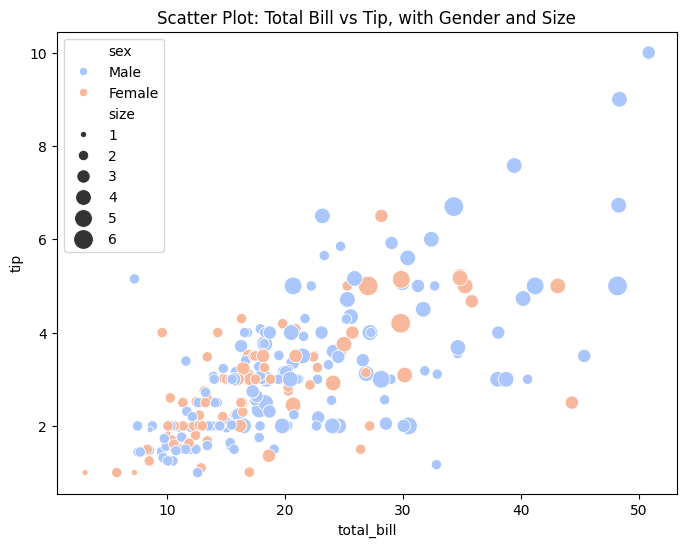

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# โหลด dataset ตัวอย่าง
df = sns.load_dataset('tips')

# สร้าง scatter plot ที่มีสีตาม 'sex' (หมวดหมู่) และขนาดตาม 'total_bill' (เชิงปริมาณ)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex', size='size', sizes=(20, 200), palette='coolwarm')

# เพิ่มชื่อกราฟ
plt.title('Scatter Plot: Total Bill vs Tip, with Gender and Size')

# แสดงกราฟ
plt.show()


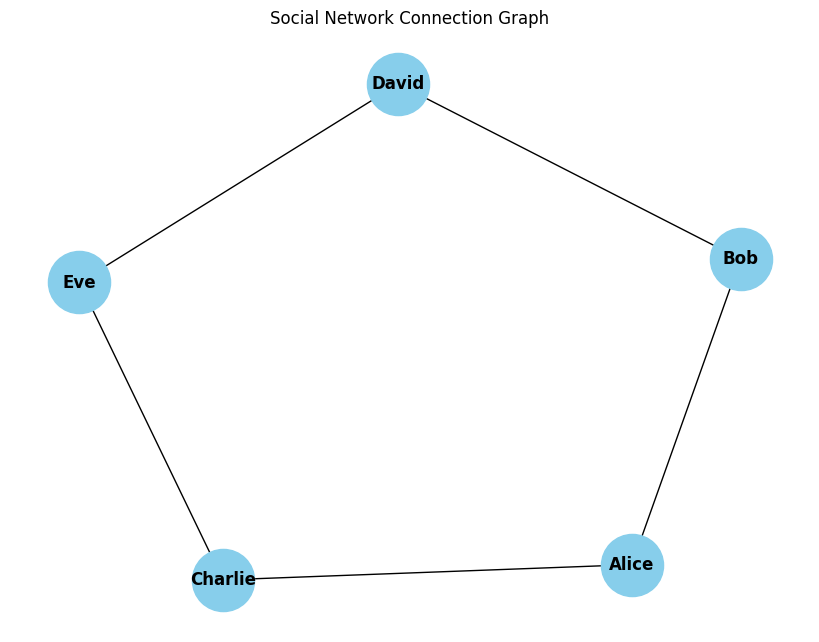

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# สร้างกราฟว่าง
G = nx.Graph()

# เพิ่ม nodes (บุคคล)
G.add_nodes_from(["Alice", "Bob", "Charlie", "David", "Eve"])

# เพิ่ม edges (การเชื่อมโยงระหว่างบุคคล)
G.add_edges_from([("Alice", "Bob"), ("Alice", "Charlie"), ("Bob", "David"), ("Charlie", "Eve"), ("David", "Eve")])

# วาดกราฟ
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', font_weight='bold', node_size=2000, font_size=12)

# เพิ่มชื่อกราฟ
plt.title("Social Network Connection Graph")

# แสดงกราฟ
plt.show()


In [56]:
import numpy as np

# สร้างข้อมูลที่มีการแจกแจงปกติ
data = np.random.normal(loc=50, scale=10, size=1000)
data_with_outliers = np.append(data, [100, 110, 120, -100, -120])

# คำนวณค่าเฉลี่ยและความเบี่ยงเบนมาตรฐาน
mean = np.mean(data_with_outliers)
std_dev = np.std(data_with_outliers)

# กำหนดเกณฑ์ที่ 3 standard deviations
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# ลบค่า outliers ที่อยู่นอกช่วงนี้
filtered_data = data_with_outliers[(data_with_outliers >= lower_bound) & (data_with_outliers <= upper_bound)]

# แสดงผล
print(f"Original data size: {len(data_with_outliers)}")
print(f"Filtered data size: {len(filtered_data)}")


Original data size: 1005
Filtered data size: 1000


In [53]:
import numpy as np

# สร้างข้อมูลที่มีการแจกแจงปกติ
data = np.random.normal(loc=50, scale=10, size=1000)

# เพิ่ม outliers
data_with_outliers = np.append(data, [100, 110, 120, -100, -120])

# คำนวณ Median และ IQR
median = np.median(data_with_outliers)
Q1 = np.percentile(data_with_outliers, 25)
Q3 = np.percentile(data_with_outliers, 75)
IQR = Q3 - Q1

# คำนวณค่าต่ำสุดและสูงสุดของ Hampel Identifier
k = 3
lower_bound = median - k * IQR
upper_bound = median + k * IQR

# ลบค่า outliers ที่อยู่นอกช่วงนี้
filtered_data = data_with_outliers[(data_with_outliers >= lower_bound) & (data_with_outliers <= upper_bound)]

# แสดงผล
print(f"Original data size: {len(data_with_outliers)}")
print(f"Filtered data size: {len(filtered_data)}")


Original data size: 1005
Filtered data size: 1000


In [34]:
import numpy as np

# สร้างข้อมูลที่มีการแจกแจงปกติ
data = np.random.normal(loc=50, scale=10, size=1000)

# เพิ่ม outliers
data_with_outliers = np.append(data, [100, 110, 120, -100, -120])

# คำนวณ Q1, Q3 และ IQR
Q1 = np.percentile(data_with_outliers, 25)
Q3 = np.percentile(data_with_outliers, 75)
IQR = Q3 - Q1

# คำนวณ lower และ upper bound สำหรับ outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ลบ outliers
filtered_data = data_with_outliers[(data_with_outliers >= lower_bound) & (data_with_outliers <= upper_bound)]

# แสดงผล
print(f"Original data size: {len(data_with_outliers)}")
print(f"Filtered data size: {len(filtered_data)}")


Original data size: 1005
Filtered data size: 993


Mean Squared Error: 2401388.654479117


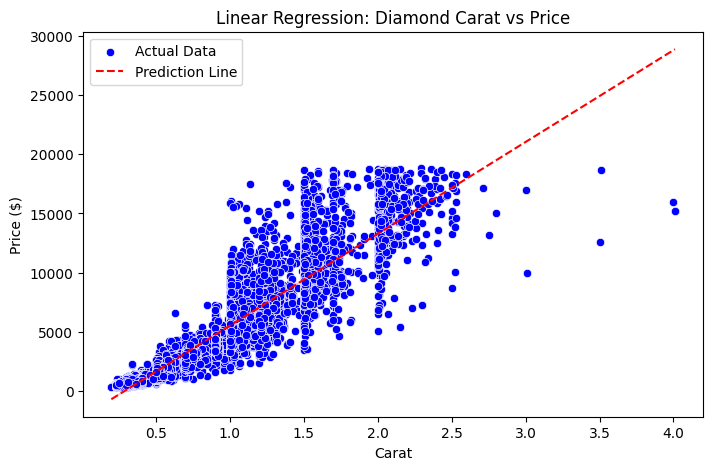

In [58]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# โหลด Diamonds Dataset
df = sns.load_dataset("diamonds")

# เลือก Feature และ Target
X = df[["carat"]]  # น้ำหนักเพชร (Carat)
y = df["price"]  # ราคาของเพชร

# แบ่ง Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างและ Train โมเดล
model = LinearRegression()
model.fit(X_train, y_train)

# พยากรณ์ราคาเพชร
y_pred = model.predict(X_test)

# คำนวณ Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# พล็อตกราฟ
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test["carat"], y=y_test, color="blue", label="Actual Data")
sns.lineplot(x=X_test["carat"], y=y_pred, color="red", linestyle="--", label="Prediction Line")
plt.xlabel("Carat")
plt.ylabel("Price ($)")
plt.legend()
plt.title("Linear Regression: Diamond Carat vs Price")
plt.show()


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



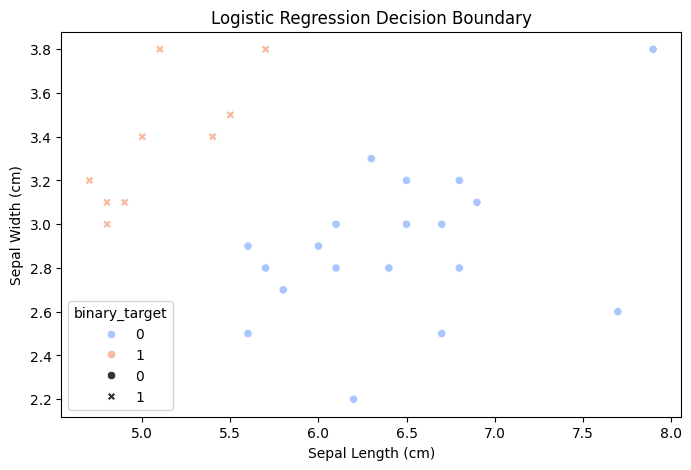

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

# โหลด Iris Dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

# แยกเฉพาะ class 0 (Setosa) และ class อื่นๆ
df["binary_target"] = (df["target"] == 0).astype(int)

# เลือก feature และ target
X = df[["sepal length (cm)", "sepal width (cm)"]]
y = df["binary_target"]

# แบ่ง Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling เพื่อให้โมเดลทำงานดีขึ้น
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# สร้าง Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# ทำนายผล
y_pred = model.predict(X_test_scaled)

# ประเมินผล
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

# พล็อต decision boundary
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test["sepal length (cm)"], y=X_test["sepal width (cm)"], hue=y_test, style=y_pred, palette="coolwarm")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Logistic Regression Decision Boundary")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

# โหลด Iris Dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# แบ่งข้อมูลเป็น train และ test
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)

# ประเมินผล
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


# Gaussian Naive Bayes → ใช้สำหรับข้อมูลที่เป็น เชิงต่อเนื่อง (continuous) และสมมติว่าแต่ละ feature กระจายตัวตาม Gaussian Distribution (Normal Distribution)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

